In [4]:
from net import OurNet
from utils import *
from random import shuffle
import matplotlib.pyplot as plt

In [5]:
X,y = loadData("IP")

In [6]:
K=30 
EPOCHS = 50
X,pca = applyPCA(X,numComponents=K)
X,y = torch.Tensor(X.astype(int)), torch.Tensor(y.astype(int))
X = scaler(X)
X,y = create_dataset(X,y, window_size=25)

In [7]:
y = y.long()
indices = list(range(len(y)))
shuffle(indices)
X_ = X[indices]
y_ = y[indices]
split_index = int(len(X)*0.4)
X_train, X_test, y_train, y_test = X_[:split_index],X[split_index:],y_[:split_index],y[split_index:]

In [8]:
net = OurNet(17)
device = torch.device("cuda:0")
device_cpu = torch.device('cpu')
net.to(device)

OurNet(
  (conv_1): Conv3d(1, 8, kernel_size=(3, 3, 7), stride=(1, 1, 1))
  (conv_2): Conv3d(8, 16, kernel_size=(3, 3, 5), stride=(1, 1, 1))
  (conv_3): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (conv_4): Conv2d(576, 64, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten()
  (dense_1): Linear(in_features=18496, out_features=256, bias=True)
  (dropout_1): Dropout(p=0.4, inplace=False)
  (dense_2): Linear(in_features=256, out_features=128, bias=True)
  (dropout_2): Dropout(p=0.4, inplace=False)
  (dense_3): Linear(in_features=128, out_features=17, bias=True)
  (log_softmax): LogSoftmax()
)

In [9]:
losses_epochs, scores, val_scores = net.train_model(X_train, y_train, device, epochs = EPOCHS, validation_data = [X_test, y_test])

100%|██████████| 32/32 [00:00<00:00, 2161.84it/s]

100%|██████████| 32/32 [00:00<00:00, 3035.16it/s]

100%|██████████| 32/32 [00:00<00:00, 3878.90it/s]

100%|██████████| 32/32 [00:00<00:00, 3936.70it/s]

100%|██████████| 32/32 [00:00<00:00, 3036.88it/s]

100%|██████████| 32/32 [00:00<00:00, 3153.61it/s]

100%|██████████| 32/32 [00:00<00:00, 4995.64it/s]

100%|██████████| 32/32 [00:00<00:00, 3947.12it/s]

100%|██████████| 32/32 [00:00<00:00, 2343.68it/s]

100%|██████████| 32/32 [00:00<00:00, 2422.75it/s]

100%|██████████| 32/32 [00:00<00:00, 3253.68it/s]

100%|██████████| 32/32 [00:00<00:00, 3012.07it/s]

100%|██████████| 32/32 [00:00<00:00, 5447.37it/s]

100%|██████████| 32/32 [00:00<00:00, 4734.98it/s]

100%|██████████| 32/32 [00:00<00:00, 2831.18it/s]

100%|██████████| 32/32 [00:00<00:00, 5085.55it/s]

100%|██████████| 32/32 [00:00<00:00, 4042.09it/s]

100%|██████████| 32/32 [00:00<00:00, 2971.33it/s]

100%|██████████| 32/32 [00:00<00:00, 4244.71it/s]

100%|██████████| 32/32 [00:00<0

In [10]:
net.score(X_test, y_test, device)

100%|██████████| 49/49 [00:00<00:00, 4797.63it/s]


0.9669961734693877

(21025,)

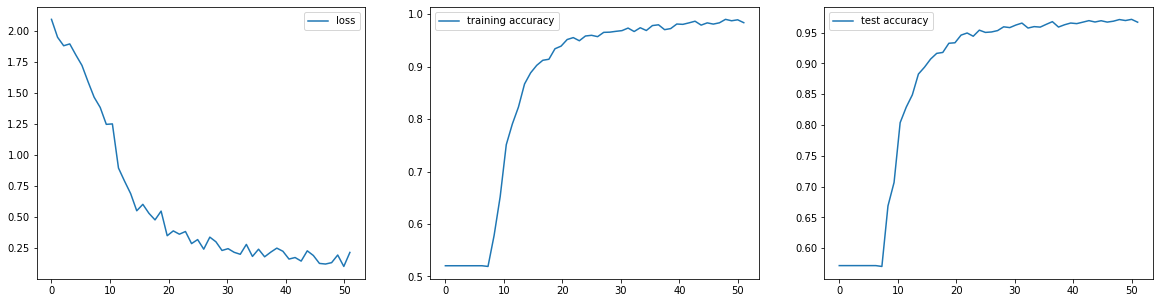

In [25]:
plt.figure(figsize=(20,5))
x = np.linspace(0, EPOCHS + 1, EPOCHS)

plt.subplot(131)
plt.plot(x, losses_epochs, label = 'loss')
plt.legend()
plt.subplot(132)
plt.plot(x, scores, label = 'training accuracy')
plt.legend()
plt.subplot(133)
plt.plot(x, val_scores, label = 'test accuracy')
plt.legend()
plt.show()


In [26]:
net.eval()

OurNet(
  (conv_1): Conv3d(1, 8, kernel_size=(3, 3, 7), stride=(1, 1, 1))
  (conv_2): Conv3d(8, 16, kernel_size=(3, 3, 5), stride=(1, 1, 1))
  (conv_3): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (conv_4): Conv2d(576, 64, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten()
  (dense_1): Linear(in_features=18496, out_features=256, bias=True)
  (dropout_1): Dropout(p=0.4, inplace=False)
  (dense_2): Linear(in_features=256, out_features=128, bias=True)
  (dropout_2): Dropout(p=0.4, inplace=False)
  (dense_3): Linear(in_features=128, out_features=17, bias=True)
  (log_softmax): LogSoftmax()
)

In [27]:
batch_size = 12
net = net.to(device)
num_its = len(X) // 12 + 1
results = []
for i in range(num_its):
    batch_X = X[i * batch_size : (i+1)*batch_size].to(device)
    predictions = net(batch_X)
    predictions = torch.argmax(predictions, axis = 1)
    results.extend(predictions)


In [28]:
results = [res.item() for res in results]

In [29]:
results = np.array(results).reshape((145,145)) / max(results)

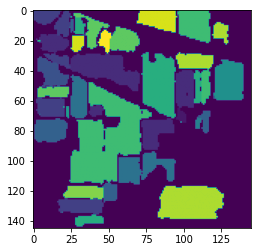

In [30]:
plt.imshow(results)

In [33]:
y = np.array(y)
y = y.reshape((145,145)) / y.max()

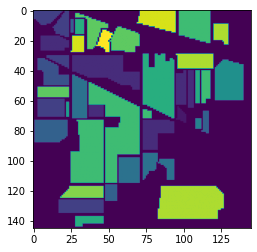

In [34]:
plt.imshow(y)